# Question 1

In [ ]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt

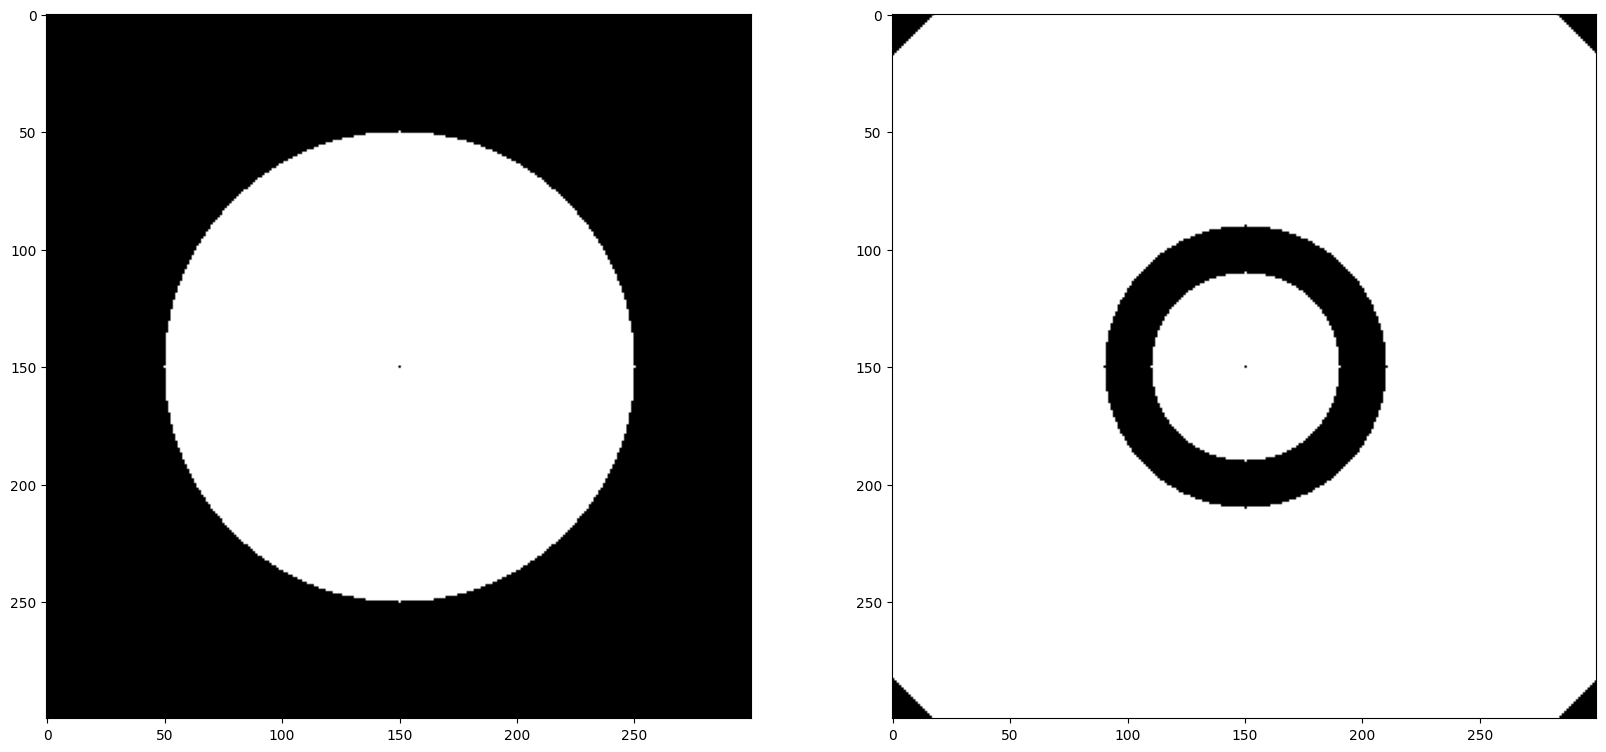

In [233]:
def get_ans(name):
    t = name.split('/')[-1].split('.')[0].replace('clock', '')
    return t[:2] + ':' + t[2:]

def show_image(
        imgs = None,
        save = True,
        save_name = 'Untitled.png'):
    plt.figure(figsize=(20, 10))
    if not isinstance(imgs, list):
        imgs = [imgs]
    for idx, img in enumerate(imgs):
        plt.subplot(1, len(imgs),idx+1)
        plt.imshow(img, cmap='gray')
    if save:
        plt.savefig(save_name)

def create_mask(
        image_size = 300):

    # Create a blank image (black)
    mask = np.zeros((image_size, image_size), dtype=np.uint8)

    # Center coordinates
    center_x = image_size // 2
    center_y = image_size // 2

    # Radius of the circle
    radius = 30

    # Create a circular mask
    y, x = np.ogrid[:image_size, :image_size]
    mask_circle = (x - center_x)**2 + (y - center_y)**2 <= radius**2

    # Apply the circular mask to the image
    mask[mask_circle] = 1

        # Inner and outer radii of the ring
    inner_radius = 140
    outer_radius = 150

    # Create a ring-like mask
    y, x = np.ogrid[:image_size, :image_size]
    mask_ring = (x - center_x)**2 + (y - center_y)**2 <= outer_radius**2
    mask_ring_inner = (x - center_x)**2 + (y - center_y)**2 <= inner_radius**2
    mask_ring = np.logical_and(mask_ring, ~mask_ring_inner)

    # Apply the ring-like mask to the image
    mask[mask_ring] = 1
    
    return mask.astype(bool)

def create_mask_hour(
        image_size = 300):

    # Create a blank image (black)
    mask = np.zeros((image_size, image_size), dtype=np.uint8)

    # Center coordinates
    center_x = image_size // 2
    center_y = image_size // 2

    # Inner and outer radii of the ring
    inner_radius = 60
    outer_radius = 200

    # Create a ring-like mask
    y, x = np.ogrid[:image_size, :image_size]
    mask_ring = (x - center_x)**2 + (y - center_y)**2 <= outer_radius**2
    mask_ring_inner = (x - center_x)**2 + (y - center_y)**2 <= inner_radius**2
    mask_ring = np.logical_and(mask_ring, ~mask_ring_inner)

    # Apply the ring-like mask to the image
    mask[mask_ring] = 1

    # Inner and outer radii of the ring
    inner_radius = 0
    outer_radius = 40

    # Create a ring-like mask
    y, x = np.ogrid[:image_size, :image_size]
    mask_ring = (x - center_x)**2 + (y - center_y)**2 <= outer_radius**2
    mask_ring_inner = (x - center_x)**2 + (y - center_y)**2 <= inner_radius**2
    mask_ring = np.logical_and(mask_ring, ~mask_ring_inner)

    # Apply the ring-like mask to the image
    mask[mask_ring] = 1
    
    return mask.astype(bool)

def create_mask_minute(
        image_size = 300):

    # Create a blank image (black)
    mask = np.zeros((image_size, image_size), dtype=np.uint8)

    # Center coordinates
    center_x = image_size // 2
    center_y = image_size // 2

    # Inner and outer radii of the ring
    inner_radius = 0
    outer_radius = 100

    # Create a ring-like mask
    y, x = np.ogrid[:image_size, :image_size]
    mask_ring = (x - center_x)**2 + (y - center_y)**2 <= outer_radius**2
    mask_ring_inner = (x - center_x)**2 + (y - center_y)**2 <= inner_radius**2
    mask_ring = np.logical_and(mask_ring, ~mask_ring_inner)

    # Apply the ring-like mask to the image
    mask[mask_ring] = 1
    
    return mask.astype(bool)

show_image(imgs=[create_mask_minute(), create_mask_hour()])


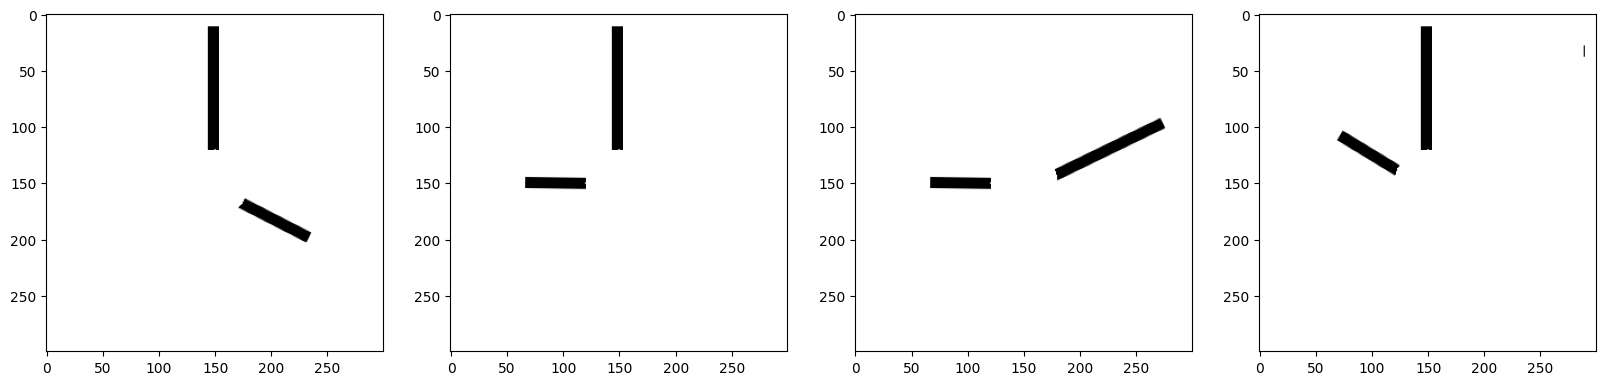

In [234]:
NAME_LIST = ['./hw3/clock0400.png','./hw3/clock0900.png','./hw3/clock0910.png','./hw3/clock1000.png']

image_pool = []
for i in NAME_LIST:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image[create_mask()] = 255
    image_pool.append(image)
show_image(image_pool)

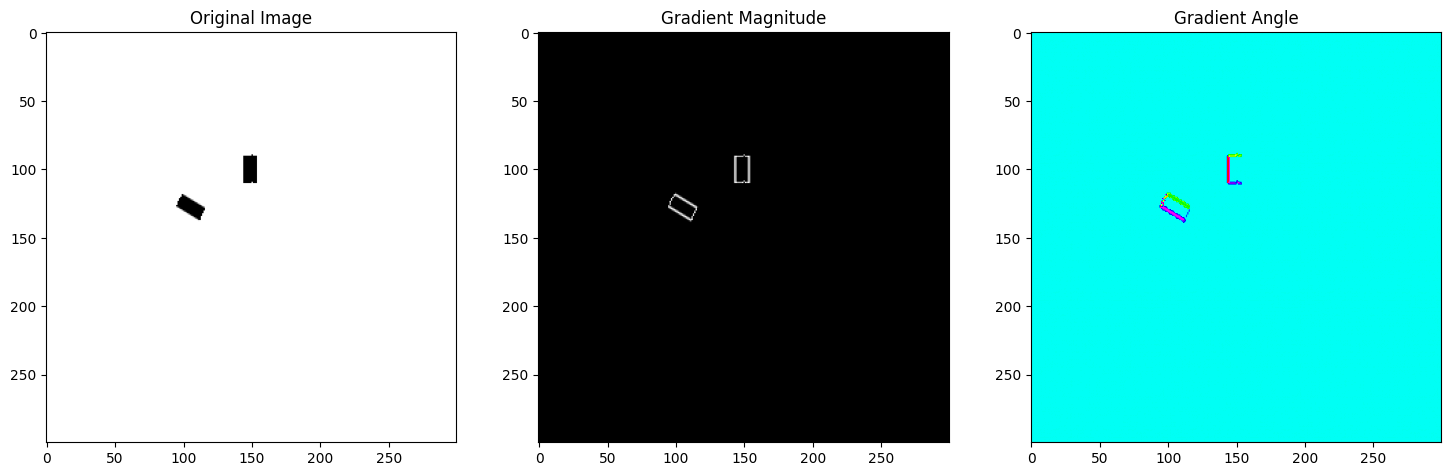

[(43, 0), (24, -90), (10, 126), (8, -48), (7, -60), (6, 132), (6, 120), (6, 114), (6, 96), (6, -54)]


In [314]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_most_n_dominant_angle(
        img = None,
        mask = None,
        show_gradient_angle = True,
        bin_size = 6,
        n = 2):
    original_image = img.copy()
    # Apply minute filter
    original_image[mask] = 255

    # Calculate the gradient using finite differences
    gradient_x = np.gradient(original_image.astype(float), axis=1)
    gradient_y = np.gradient(original_image.astype(float), axis=0)

    # Calculate the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude[mask] = 0
    # Calculate the gradient angle (in degrees)
    gradient_angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)

    if show_gradient_angle:
        # Display the original image, gradient magnitude, and gradient angle
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        plt.imshow(original_image, cmap='gray')
        plt.title('Original Image')

        plt.subplot(1, 3, 2)
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title('Gradient Magnitude')

        plt.subplot(1, 3, 3)
        plt.imshow(gradient_angle, cmap='hsv', vmin=-180, vmax=180)
        plt.title('Gradient Angle')

        plt.show()

    angle_counts = {}
    for i in range(-180, 180):
        angle_counts[i] = 0

    for i in range(300):
        for j in range(300):
            if gradient_magnitude[i][j] != 0:
                if (int(gradient_angle[i][j])//6)*6 in angle_counts:
                    angle_counts[(int(gradient_angle[i][j])//6)*6] += 1
    
    l = []
    for i in angle_counts:
        if angle_counts[i] != 0 and i != 90:
            l.append((angle_counts[i], i))
    l.sort(reverse=True)
    return l[:n]

    
print(get_most_n_dominant_angle(image_pool[3], create_mask_hour(), n= 10))

In [313]:
def calculate_time(angle_freq_minute, angle_freq_hour):
    # for minute
    ## if -90, 90, 0, 180 freq not exceed 50 it's must be noise from edge -> get the first one that's not noise
    M = ''
    minute_angle = 0
    for i in angle_freq_minute:
        freq, angle = i
        if angle in [-180, -90, 0, 90, 180] and freq <= 50:
            continue
        M = str(angle//(360//60))
        minute_angle = angle
        break

    if len(M) == 1:
        M = '0' + M
    # for hour
    H = ''
    for i in angle_freq_hour:
        freq, angle = i
        if angle in [-180, -90, 0, 90, 180] and freq <= 50 or angle == minute_angle:
            continue
        H = str(angle//(360//12)+12 if angle//(360//12)<0 else angle//(360//12))
        break
    if H =='':
        H = str(angle//(360//12))
    if len(H) == 1:
        H = '0'+H
    return H+':'+M

for idx in range(4):
    print(idx)
    print(calculate_time(get_most_n_dominant_angle(image_pool[idx], create_mask_minute(), n=10, show_gradient_angle=False),
                     get_most_n_dominant_angle(image_pool[idx], create_mask_hour(), n=10, show_gradient_angle=False)))

0
04:00
1
09:00
2
09:08
3
04:00


# Question 3

In [9]:
import cv2
import numpy as np
import  matplotlib.pyplot as plt

In [33]:
def show_image(
        imgs = None,
        save = True,
        save_name = 'Untitled.png'):
    plt.figure(figsize=(20, 10))
    if not isinstance(imgs, list):
        imgs = [imgs]
    for idx, img in enumerate(imgs):
        plt.subplot(1, len(imgs),idx+1)
        plt.imshow(img, cmap='gray')
    if save:
        plt.savefig(save_name)
    

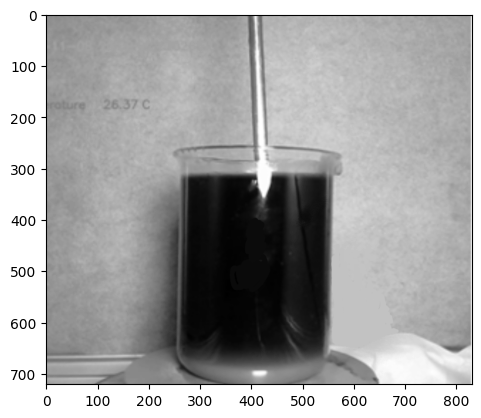

In [15]:
original_image = cv2.imread('./hw3/Oil.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

show_image(original_image)

## image enhancement
- use log transform

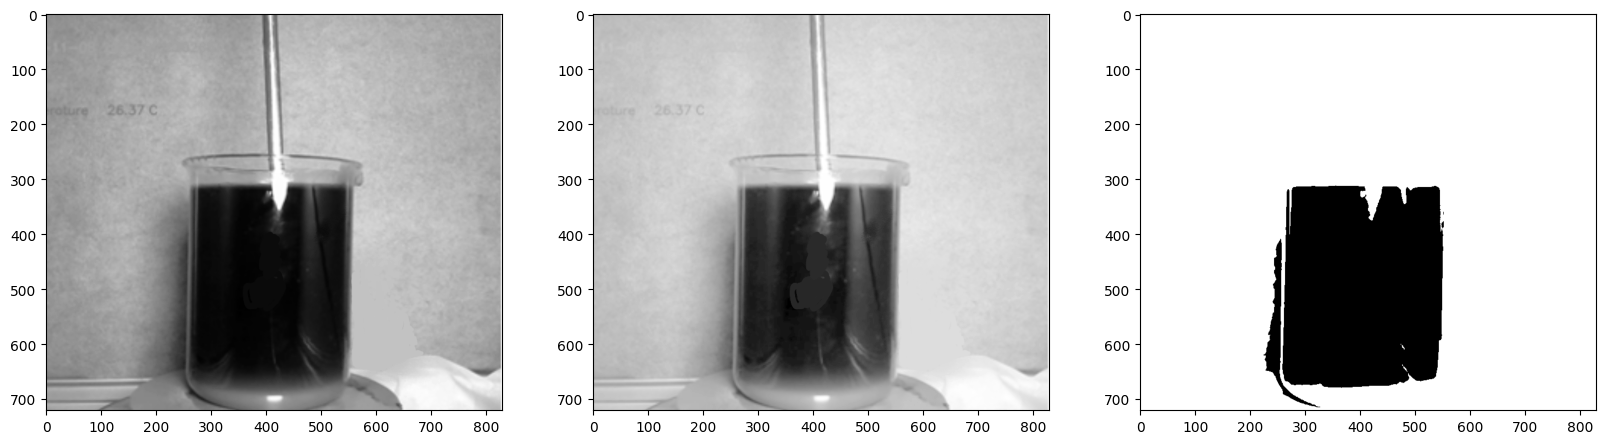

In [34]:
GAMMA = 0.5

power_transformed_image = np.power(original_image.astype(np.float32) / 255.0, GAMMA)

power_transformed_image_uint8 = (power_transformed_image * 255).astype(np.uint8)

_, binary_image = cv2.threshold(power_transformed_image_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_image(
    imgs=[original_image, power_transformed_image, binary_image],
    save_name='oil_transformed.png'
)


## calculate width and height

(721, 830)


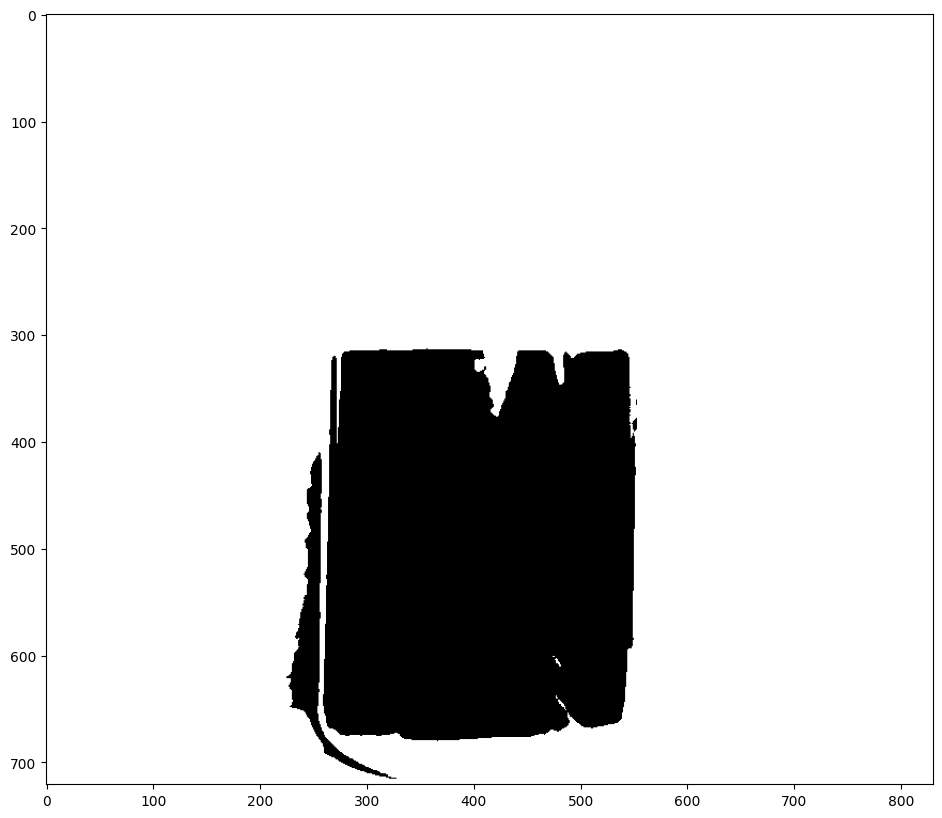

In [255]:
work_image = binary_image.astype(np.uint)
print(work_image.shape)
show_image(work_image, save=False)

In [256]:
height, width = work_image.shape

x_middle = width // 2 - 50
y_middle = height // 2

print('x middle =', x_middle)
print('y middle =', y_middle)


x middle = 365
y middle = 360


In [257]:
# go in X line
y_min, y_max = float('inf'), 0
for i in range(height):
    if work_image[i][x_middle] == 0:
        y_max = max(y_max, i)
        y_min = min(y_min, i)

# go in Y line
x_min, x_max = float('inf'), 0
for i in range(width):
    if work_image[y_middle][i] == 0:
        x_max = max(x_max, i)
        x_min = min(x_min, i)

print('X', x_min, x_max)
print('Y', y_min, y_max)

X 266 546
Y 314 679


In [258]:
REAL_WIDTH = 18 # cm.
pixel_width = x_max - x_min

cm_per_pixel = REAL_WIDTH / pixel_width

pixel_height = y_max - y_min
real_height = cm_per_pixel * pixel_height

print(cm_per_pixel, 'cm./ pixel')
print('real height =', real_height)

0.06428571428571428 cm./ pixel
real height = 23.46428571428571


In [259]:
volume = np.pi*(9)**2*real_height
print(volume, 'cm.^3')

5970.933437360285 cm.^3


## 3.2

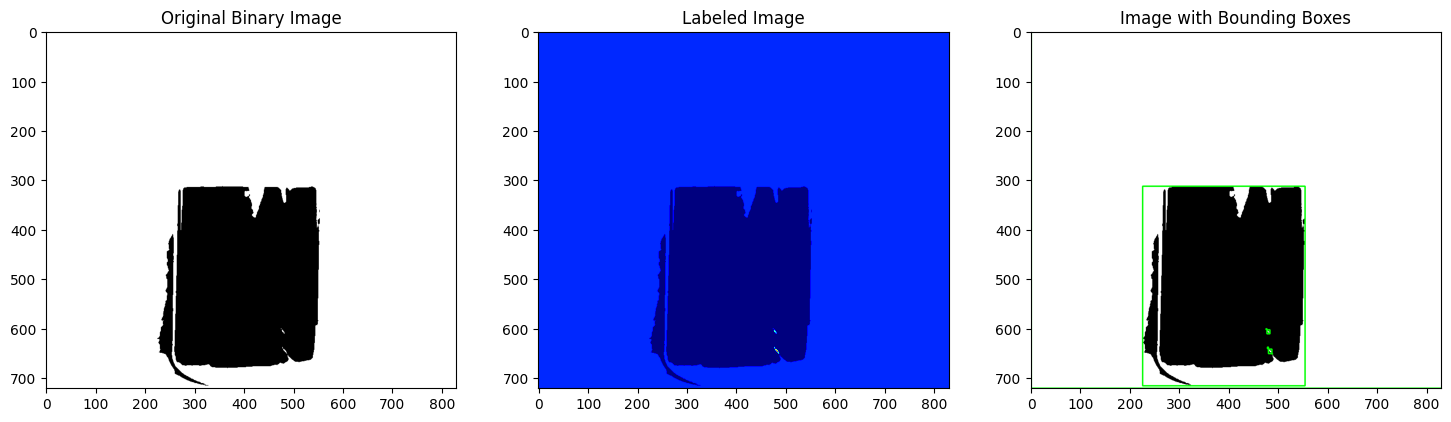

Number of labels: 6
Label 0: Area=104770, Centroid=[397.35102606 500.68876587], Bounding Box=(225, 313, 328, 403, 104770)
Label 1: Area=493611, Centroid=[418.13339654 330.11188162], Bounding Box=(0, 0, 830, 721, 493611)
Label 2: Area=2, Centroid=[474.5 601. ], Bounding Box=(474, 601, 2, 1, 2)
Label 3: Area=19, Centroid=[478.52631579 606.57894737], Bounding Box=(476, 603, 6, 8, 19)
Label 4: Area=4, Centroid=[477.25 639.25], Bounding Box=(477, 638, 2, 3, 4)
Label 5: Area=23, Centroid=[482.08695652 645.52173913], Bounding Box=(479, 642, 7, 9, 23)
Label 6: Area=1, Centroid=[486. 651.], Bounding Box=(486, 651, 1, 1, 1)


In [269]:
# Perform connected component labeling with stats
num_labels, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=4)

# Draw bounding boxes on the original image
bounding_box_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)  # Convert to color for bounding box drawing

for label in range(0, num_labels):
    left, top, width, height,_ = stats[label, cv2.CC_STAT_LEFT:cv2.CC_STAT_TOP + 4]
    bottom = top + height
    right = left + width

    # Draw bounding box
    cv2.rectangle(bounding_box_image, (left, top), (right, bottom), (0, 255, 0), 2)

# Display the original binary image, the labeled image, and the image with bounding boxes
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(labeled_image, cmap='jet')
plt.title('Labeled Image')

plt.subplot(1, 3, 3)
plt.imshow(bounding_box_image)
plt.title('Image with Bounding Boxes')

plt.show()

# Print statistics for each connected component
print(f'Number of labels: {num_labels - 1}')  # Exclude background label (0)
for label in range(0, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    centroid = centroids[label]
    bounding_box = tuple(stats[label, cv2.CC_STAT_LEFT:cv2.CC_STAT_TOP + 4])
    print(f'Label {label}: Area={area}, Centroid={centroid}, Bounding Box={bounding_box}')


In [271]:
width = right - left
height = bottom - top

cm_per_pixel = 18/width
real_height = height * cm_per_pixel

volume = np.pi*9**2*real_height
print(volume, 'cm.^3')

4580.442088933918 cm.^3
